# Модель водяного колеса Лоренца

Эдвард Нортон Лоренц  
![image.png](https://lh3.googleusercontent.com/proxy/WnCKvzD8G4g9Gnmyfv3X_9ZXG1UiKZNYVSaYaYcLhEqWvGV7bzjetJkWky420dFFpGcCsHbIgk5436MdFhDjz_8pdPGmj9r7i4l1mnv-po-7zFkM0nkIak361SOUpZqnIVngMwN_XIKXBFqKfIAMQEZ9e3zgxg)  
Американский математик и метеоролог, один из основоположников теории хаоса, автор выражения «эффект бабочки», а также создатель аттрактора Лоренца.

## Аттрактор Лоренца

Странный аттрактор впервые найденный Лоренцем в нелинейной системе обыкновенных дифференциальных уравнений
\begin{cases}
\dot x = \sigma(y - x)\\
\dot y = x(r - z) - y\\
\dot z = xy - bz\\
\end{cases}
Впервые эта система была выведена как первое нетривиальное галёркинское приближение для задачи конвекции морской воды в плоском слое. Здесь $x$ $-$ скорость вращения водяных валов, $y$ и $z$ отвечают за распределение температуры по горизонтали и вертикали, $r$ $-$ нормированное число Рэлея, $\sigma$ $-$ число Прандтля, $b$ $-$ информация о геометрии конвективной ячейки.
Если выбрать такие значения параметров $\sigma = 10$ $b = 8/3$ $r = 28$, то в системе установится хаотический автоколебательный режим, что интересно практически один и тот-же(по крайней мере для средних статистичских значений системы) для различных начальных значений системы. Однако модель является довольно грубым приблежением.
Это можно протеститовать изменяя стартовые значения в приведенной ниже модели построения аттрактора Лоренца.

После изменения параметров рекомендуется **перезапускать все ячейки**. Также весь код есть в отдельном [файле](https://github.com/Kuleshovegor/Lorenz-mill-model/blob/master/Lorenz_mill_model.py), в нем гораздо удобнее работать с графиками.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as sc

Начальные значения системы

In [ ]:
start_x = 1.
start_y = 0.
start_z = 0.

Значения параметров $\sigma$, $b$, $r$:

In [ ]:
sigma = 10
r = 28
b = 8. / 3.

Количество шагов вычисления функции и промежуток времени между шагами:

In [ ]:
dt = 0.01
num_steps= 100000

Функция вычисляющая по $x$, $y$, $z$ их производные:

In [ ]:
def lorenz(x, y, z, s, b, r):
    x_diff = s * (y - x)
    y_diff = r * x - y - x * z
    z_diff = x * y - b * z
    return x_diff, y_diff, z_diff

Функция вычиляющая $x$, $y$, $z$ на каждом шаге:

In [ ]:
def get_lorenz_attractor_data(dt, num_steps, start_x, start_y, start_z):
    x_array = np.empty(num_steps + 1)
    y_array = np.empty(num_steps + 1)
    z_array = np.empty(num_steps + 1)

    x_array[0], y_array[0], z_array[0] = (start_x, start_y, start_z)

    for i in range(num_steps):
        x_diff, y_diff, z_diff = lorenz(x_array[i], y_array[i], z_array[i], sigma, b, r)
        x_array[i + 1] = x_array[i] + (x_diff * dt)
        y_array[i + 1] = y_array[i] + (y_diff * dt)
        z_array[i + 1] = z_array[i] + (z_diff * dt)
    return x_array, y_array, z_array

Построение графика по данным:

In [ ]:
def plot_lorenz_attractor(x_array, y_array, z_array):
    figure1 = plt.figure()
    attractor = figure1.gca(projection='3d')
    attractor.plot(x_array, y_array, z_array, lw=0.05)
    attractor.set_xlabel("X")
    attractor.set_ylabel("Y")
    attractor.set_zlabel("Z")
    attractor.set_title("Lorenz Attractor")
    plt.show()

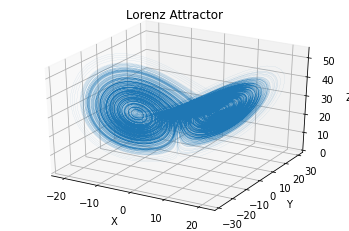

In [ ]:
x_array, y_array, z_array = get_lorenz_attractor_data(dt, num_steps, start_x, start_y, start_z)
plot_lorenz_attractor(x_array, y_array, z_array)

### Аналитическое исследование системы Лоренца

#### Симметрия
Система обладает симметрией, при одновременной замене $x$ на $-x$ и $y$ на $-y$ получим:

\begin{cases}
-\dot x = \sigma((-y) - (-x))\\
-\dot y = (-x)(r - z) - (-y)\\
\dot z = (-x)(-y) - bz\\
\end{cases}

\begin{cases}
-\dot x = -\sigma(y - x)\\
-\dot y = -(x(r - z) - y)\\
\dot z = xy - bz\\
\end{cases}

\begin{cases}
\dot x = \sigma(y - x)\\
\dot y = x(r - z) - y\\
\dot z = xy - bz\\
\end{cases}

Из графика выше можно увидеть эту симметрию.

#### Однородность
Так как в правых частях нет свободных членов, система является однородной. Из чего можно сделать вывод, что независимо от параметров $\sigma$, $b$, $r$ существует нулевая стационарная точка.

#### Неподвижные точки
Найдем неподвижные точки, решив систему
\begin{cases}
0 = \sigma(y - x)\\
0 = x(r - z) - y\\
0 = xy - bz\\
\end{cases}
\begin{cases}
y = x\\
0 = y(r - z) - y\\
0 = yy - bz\\
\end{cases}
Если $y = 0$, то и $x = 0$, $z = 0$.Иначе:
\begin{cases}
y = x\\
z = r - 1\\
y^2 = b(r - 1)\\
\end{cases}
Таким образом (0, 0, 0), ($\sqrt{b(r - 1)}$, $\sqrt{b(r - 1)}$, r - 1), (-$\sqrt{b(r - 1)}$, -$\sqrt{b(r - 1)}$, r - 1) являются неподвижными точками.
Проанализируем эти точки на устойчивость. Составим матрицу:
\begin{pmatrix}
-\sigma& \sigma& 0\\
r - z_0& -1& -x_0\\
y_0& x_0& -b
\end{pmatrix}
Найдем собственные числа:
\begin{equation}
\begin{vmatrix}
\lambda -\sigma& \sigma& 0\\
r - z_0& \lambda - 1& -x_0\\
y_0& x_0& \lambda - b\\
\end{vmatrix} = (\lambda + \sigma)((\lambda + 1)(\lambda + b) + x_0^2) + \sigma((\lambda + b)(z_0 - r) + x_0y_0)) = 0
\end{equation}
Для точки (0, 0, 0):
\begin{equation}
(\lambda + b)(\lambda^2 + (\sigma + 1)\lambda + \sigma(1 - r)) = 0
\end{equation}
$\lambda_1 = -b$, $\lambda_{2,3} = -\frac{1}{2}(\sigma + 1) \pm \sqrt{\frac{1}{4}(\sigma + 1)^2 + \sigma(r - 1)}\\$
При $r > 1$ точка неустойчива, при $r < 1$ устойчива.
Для точек ($\pm\sqrt{b(r - 1)}$, $\pm\sqrt{b(r - 1)}$, r - 1):
\begin{equation}
\lambda^3 + (\sigma + b + 1)\lambda^2 + b(\sigma + r)\lambda + 2\sigma b(r - 1) = 0
\end{equation}
Исследование уравнения показывает, что при r, немного превышающим 1, три собственных числа отрицательные, т.е. точки являются устойчивыми узлами, при увеличении r становятся устойчивыми фокусами, а далее действительные части меняют знак и устойчивость точек теряется.

#### Ограниченность области аттрактора(bonus)
Данное свойство аттарктора говорит о том, что в фазовом пространстве существует замкнутая область, в которую фазовые траектории могут только входить и не выходить.
Для этого рассмотрим систему, c заменой $w = r - z$.

\begin{cases}
\dot x = \sigma(y - x)\\
\dot y = x(r - z) - y\\
\dot (r - z) = -xy - b(r - z) + br\\
\end{cases}

\begin{cases}
\dot x = \sigma(y - x)\\
\dot y = xw - y\\
\dot w = -xy - bw + br\\
\end{cases}

Далее домножим первое уравнение на $x/\sigma$, второе на $y$, а третье на $w$

\begin{cases}
\dot (\frac{x^2}{2\sigma}) = yx - x^2\\
\dot (\frac{y^2}{2}) = xwy - y^2\\
\dot (\frac{w^2 }{2}) = -xyw - bw^2 + brw\\
\end{cases}

Просуммируем
\begin{equation}\frac{d}{dt}(\frac{x^2 / \sigma + y^2 + w^2}{2}) = yx - x^2 + xwy - y^2 - xyw - bw^2 + brw = -(x - \frac{y}{2}) ^2 + \frac{br^2}{4} - \frac{3}{4}y^2 - b(w - \frac{r}{2})^2\end{equation}
Рассмотрим область $\frac{d}{dt}(\frac{x^2 / \sigma + y^2 + w^2}{2}) = -(x - \frac{y}{2}) ^2 - \frac{3}{4}y^2 - b(w - \frac{r}{2})^2 + \frac{br^2}{4} \geqslant 0$. Она ограничена некоторым эллипсоидом. Сформируем эллипсоид S: $\frac{x^2}{\sigma} + y^2 + w^2 = const$ и целиком содержащий указанную выше область. На поверхности эллипсоида производная $\frac{d}{dt}(\frac{x^2}{\sigma} + y^2 + w^2) < 0$, т.к. вне области неравенство не выпоняется. Тогда $\frac{x^2}{\sigma} + y^2 + w^2$ убывает с увеличением времени, значит все траектории ведут только внутрь области и аттрактор находтся внутри. Это отчасти подтверждает независимость от начального положения, т.к. если модель попадает внутрь области, то уже не покидает её.

## Колесо Лоренца

Колесо Лоренца является одной из физических моделей, которые описываются системой уравнений Лоренца.  Рассматривается задача о колесе, на ободе которого укреплены корзины с отверстиями в дне. Сверху на колесо симметрично относительно оси вращения льётся сплошной поток воды. Регулируя количество поступающей и утекающей воды можно получить как состояние покоя или равномерное движение колеса, так и хаотическое движение колеса. Здесь x и у $-$ это расределение массы воды по ободу колеса, а z $-$ это угловая скорость колеса.  
![image.png](https://baguzin.ru/wp/wp-content/uploads/2013/02/2.-%D0%92%D0%BE%D0%B4%D1%8F%D0%BD%D0%BE%D0%B5-%D0%BA%D0%BE%D0%BB%D0%B5%D1%81%D0%BE-%D0%9B%D0%BE%D1%80%D0%B5%D0%BD%D1%86%D0%B0.jpg)

[Видео](https://youtu.be/7iNCfNBEJHo) демонстрирующее движение колеса.

### Система для водяного колеса Лоренца

Выведем систему уравнений для частного случая колеса Лоренца. Для просты воспользуемся такой моделью колеса, какая изображена на рисунке ниже:
      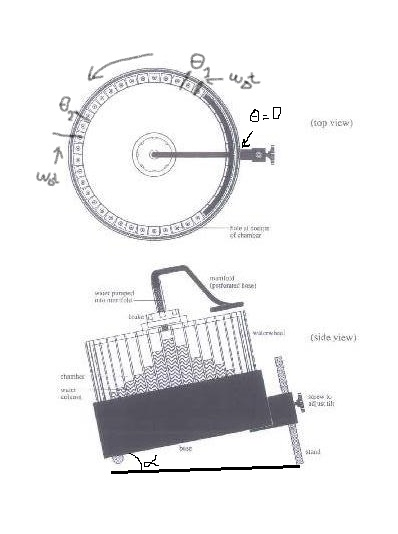
Обозначим:
1. $w(t)$ $-$ функция угловой скорости.
2. $\theta$ $-$ угол поворота колеса в точке залива воды равен 0.
3. $Q(\theta)$ $-$ функция количества прибывающей воды в точке $\theta$.
4. $r$ $-$ радиус колеса.
5. $m(\theta, t)$ $-$ распределение массы воды по ободу колеса.
6. $\alpha$ $-$ угол наклона колеса(стенда).

Масса воды на участке от $\theta_1$ до $\theta_2$  
$M = \int_{\theta_1}^{\theta_2} m(\theta, t) d\theta$  
#### Закон сохранения массы

\begin{equation}\frac{dm}{dt} = Q - km - w\frac{dm}{d\theta}\end{equation} где $Q$ $-$ масса поступившей воды, $km$ $-$ масса утекшей воды ($k$ $-$ коэффицент утечки), $w\frac{dm}{d\theta}$ $-$ масса воды появившейся и ушедшей из сектора $[\theta_1, \theta_2]$ в следствии вращения колеса.  
Докажем:  
Рассмотрим сектор колеса $[\theta_1, \theta_2]$.  
Обозначим $M = \int_{\theta_1}^{\theta_2} m(\theta, t) d\theta$, тогда за время $\Delta t$ масса изменится на $\Delta M$
\begin{equation}
\Delta M = \Delta t(\int_{\theta_1}^{\theta_2} Q(\theta) d\theta) - \int_{\theta_1}^{\theta_2} km d\theta + m(\theta_1)w\Delta t - m(\theta_2)w\Delta t)
\end{equation}
$m(\theta_1)w\Delta t$ $-$ появившаяся масса воды в секторе $[\theta_1, \theta_2]$.  
$m(\theta_2)w\Delta t$ $-$ ушедшая масса воды в секторе $[\theta_1, \theta_2]$.  
Заметим:
\begin{equation}
m(\theta_1) - m(\theta_2) = -\int_{\theta_1}^{\theta_2} \frac{dm}{d\theta} d\theta
\end{equation}
Тогда
\begin{equation}
\Delta M = \Delta t(\int_{\theta_1}^{\theta_2}(Q - km - w\frac{dm}{d\theta}){d\theta})\\
\Delta t \rightarrow 0 \\
\frac{\Delta M}{\Delta t} = \dot M = \int_{\theta_1}^{\theta_2}(Q - km - w\frac{dm}{d\theta}){d\theta}\\
\int_{\theta_1}^{\theta_2}\frac{dm}{dt}d\theta = \int_{\theta_1}^{\theta_2}(Q - km - w\frac{dm}{d\theta}){d\theta}\\
\frac{dm}{dt} = (Q - km - w\frac{dm}{d\theta})\\
\end{equation}
Доказано.
#### Момент инерции колеса
$I(t)$ $-$ момент инерции колеса в момент $t$.  
$(Iw)' = -\nu w +$ влияние гравитации
1. $\nu$ $-$ коэффициент затухания.
2. В секторе $d\theta$ массы $dM = md\theta$ крутящий момент $d\tau = dM\cdot g\sin{\alpha}\cdot r \sin(\theta)$ 
$\tau = \int_{0}^{2\pi}m(\theta, t) g_e r \sin(\theta)d\theta$ (пусть $g_e = g\sin(a)$)  

Тогда имеем:
\begin{equation}
\frac{d}{dt}(Iw) = -\nu w + g_e r \int_{0}^{2\pi}m(\theta, t) \sin(\theta)d\theta
\end{equation}
Наука знает, что $I(t) \rightarrow const$, при $t \rightarrow \infty$, значит
\begin{equation}
Iw' = -\nu w + g_e r \int_{0}^{2\pi}m(\theta, t) \sin(\theta)d\theta
\end{equation}
#### Итого
Получим систему:
\begin{cases}
\frac{dm}{dt} = Q - km - w\frac{dm}{d\theta}\\
Iw' = -\nu w + g_e r \int_{0}^{2\pi}m(\theta, t) \sin(\theta)d\theta
\end{cases}
#### Магия Фурье
Заметим, что $m(\theta, t)$ имеет период $2\pi$ по $\theta$, тогда разложим её
\begin{equation}
m(\theta, t) = \sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta)
\end{equation}
Также
\begin{equation}
Q(\theta) = \sum_{n=0}^{\infty} q_n \cos(n\theta)
\end{equation}
Подставим
\begin{cases}
\frac{d}{dt}(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta)) = (\sum_{n=0}^{\infty} q_n \cos(n\theta)) - k(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta)) - w\frac{d}{d\theta}(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta))\\
Iw' = -\nu w + g_e r \int_{0}^{2\pi}(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta))(\theta, t) \sin(\theta)d\theta
\end{cases}
\begin{cases}
\frac{d}{dt}(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta)) = (\sum_{n=0}^{\infty} q_n \cos(n\theta)) - k(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta)) - w\frac{d}{d\theta}(\sum_{n=0}^{\infty} a_n(t) \sin(n\theta) +  b_n(t) \cos(n\theta))\\
Iw' = -\nu w + \pi g_e r a_1
\end{cases}
Выразим  
$\sin(n\theta)$: $\dot a_n = nwb_n - ka_n$  
$\cos(n\theta)$: $\dot b_n = -nwa_n + q_n - kb_n$  
Тогда
\begin{cases}
\dot a_1 = wb_1 - ka_1\\
\dot b_1 = -wa_1 + q_1 - kb_1\\
\dot w = (-\nu w + \pi g_e r a_1)/I
\end{cases}

### Свойства
Для этой частной системы теряются свойства симметричности и однородности, но, если подобрать нужные значения парамметров и провести некоторые преобразования с системой, можно получить аногичную системе Лоренца. Найдем неподвижные точки:
\begin{cases}
0 = wb_1 - ka_1\\
0 = -wa_1 + q_1 - kb_1\\
0 = (-\nu w + \pi g_e r a_1)/I
\end{cases}

\begin{cases}
b_1 = \frac{k}{w}a_1\\
0 = -\frac{\pi g_e r}{\nu} a_1^2 + q_1 - \frac{k^2}{w}a_1\\
w = \frac{\pi g_e r}{\nu} a_1
\end{cases}

Eсли $a_1 = 0$, то $w = 0$ и $b_1 = \frac{q_1}{k}$, иначе:

\begin{cases}
b_1 = \frac{k\nu}{\pi g_e r}\\
a_1^2 = \frac{\nu}{\pi g_e r}(q - \frac{k^2\nu}{\pi g_e r})\\
w = \frac{\pi g_e r}{\nu} a_1
\end{cases}
Точки: (0, $\frac{q_1}{k}$, 0), ($\sqrt{\frac{\nu}{\pi g_e r}(q - \frac{k^2\nu}{\pi g_e r})}$, $\frac{k\nu}{\pi g_e r}$, $\frac{\pi g_e r}{\nu}\sqrt{\frac{\nu}{\pi g_e r}(q - \frac{k^2\nu}{\pi g_e r})}$), (-$\sqrt{\frac{\nu}{\pi g_e r}(q - \frac{k^2\nu}{\pi g_e r})}$, $\frac{k\nu}{\pi g_e r}$, -$\frac{\pi g_e r}{\nu}\sqrt{\frac{\nu}{\pi g_e r}(q - \frac{k^2\nu}{\pi g_e r})}$)

### Модель
Ниже предствлена компьютерная модель колеса с графиками.

Начальные значения системы:

In [ ]:
start_a=0.
start_b=0.
start_w=0.1

Значения параметров k(параметр утечки), alpha(параметр наклона), q(параметр накачки воды), v(параметр затухания), inerc(параметр инерции колеса):

In [ ]:
k=1
alpha=math.pi/7
q=2.5
v=3.3
r=1.4
inerc=1

Количество шагов вычисления функции и промежуток времени между шагами:

In [ ]:
dt = 0.01
num_steps= 100000

Функция вычисляющая по $a$, $b$, $w$ их производные:

In [ ]:
def lorenz_mill(a, b, w, k, alpha, q, v, r, inerc):
    a_diff = w * b - k * a
    b_diff = -w * a - k * b + q
    w_diff = (-v / inerc) * w + ((math.pi * sc.g * math.sin(alpha) * r) / inerc) * a
    return a_diff, b_diff, w_diff

Функция вычиляющая $a$, $b$, $w$ на каждом шаге:

In [ ]:
def get_lorenz_mill_data(dt, num_steps, k, alpha, q, v, r, inerc, start_a, start_b, start_w):
    a_array = np.empty(num_steps + 1)
    b_array = np.empty(num_steps + 1)
    w_array = np.empty(num_steps + 1)
    t_array = np.empty(num_steps + 1)

    a_array[0], b_array[0], w_array[0] = (start_a, start_b, start_w)
    t_array[0] = 0

    for i in range(num_steps):
        a_diff, b_diff, w_diff = lorenz_mill(a_array[i], b_array[i], w_array[i], k=k, alpha=alpha, q=q, v=v, r=r,
                                             inerc=inerc)
        a_array[i + 1] = a_array[i] + (a_diff * dt)
        b_array[i + 1] = b_array[i] + (b_diff * dt)
        w_array[i + 1] = w_array[i] + (w_diff * dt)
        t_array[i + 1] = t_array[i] + dt
    return a_array, b_array, w_array, t_array

Построение графиков по данным:

In [ ]:
def plot_lorenz_mill_graphs(a_array, b_array, w_array, t_array):
    fig1 = plt.figure()
    fig2 = plt.figure()
    fig3 = plt.figure()
    attractor = fig1.gca(projection='3d')
    angular_velocity = fig2.gca()
    velocity_distribution = fig3.gca()
    max_velocity = max(int(np.max(w_array) + 1), abs(int(np.min(w_array) + 1)))
    values = np.arange(-max_velocity, max_velocity, 0.5)
    num_values = np.empty(4 * max_velocity)
    for i in range(4 * max_velocity):
        num_values[i] = 0
    for i in range(len(w_array)):
        mn = max_velocity
        mn_value = 0
        for c in values:
            if abs(w_array[i] - c) < mn:
                mn = abs(w_array[i] - c)
                mn_value = c
        num_values[int(2 * (mn_value + max_velocity)) - 1] += 1

    velocity_distribution.plot(values, num_values)

    angular_velocity.plot(t_array, w_array, lw=0.1)
    attractor.plot(a_array, b_array, w_array, lw=0.1)
    attractor.set_xlabel("A")
    attractor.set_ylabel("B")
    attractor.set_zlabel("W")
    attractor.set_title("Lorenz Mill Attractor")
    velocity_distribution.set_xlabel("Angular velocity")
    velocity_distribution.set_ylabel("Number of repetitions")
    velocity_distribution.set_title("Velocity distribution")
    angular_velocity.set_xlabel("Time")
    angular_velocity.set_ylabel("Angular velocity")
    angular_velocity.set_title("Angular velocity")

    plt.show()

Первый трехмерный график зависимости $a$, $b$ и $w$, на нем как раз и отображается аттрактор, воторой показывает изменение угловой скорости от времени, а третий показывает распределение угловой скорости за время эксперимента.

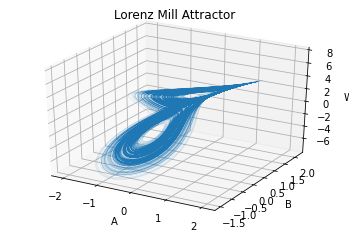

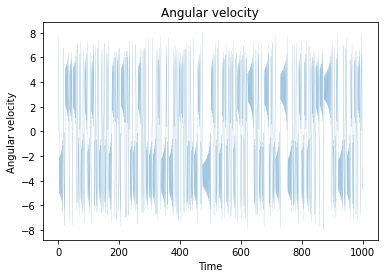

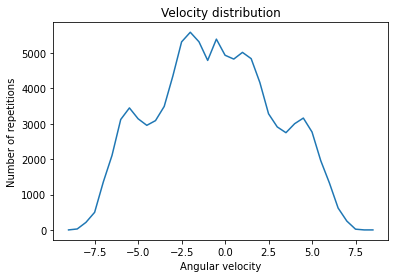

In [ ]:
x_array, y_array, z_array, t_array = get_lorenz_mill_data(dt, num_steps, k, alpha, q, v, r, inerc, start_a, start_b, start_w)
plot_lorenz_mill_graphs(x_array, y_array, z_array, t_array)

Запустим, те же вычисления на немного измененных начальных значениях.

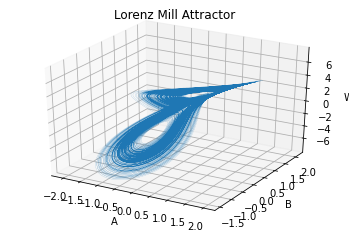

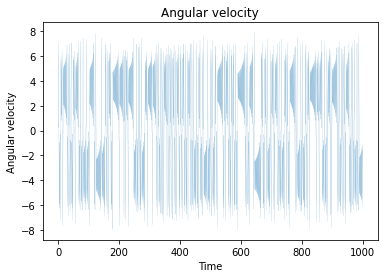

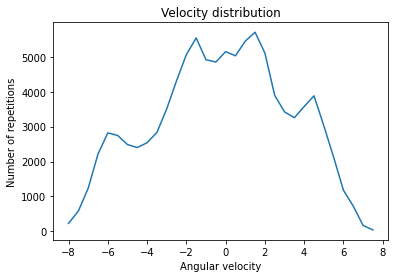

In [ ]:
x_array, y_array, z_array, t_array = get_lorenz_mill_data(dt, num_steps, k, alpha, q, v, r, inerc, start_a, start_b, start_w + 0.5)
plot_lorenz_mill_graphs(x_array, y_array, z_array, t_array)

Запуская вычисления для разного количества итераций и сравнивая графики можно увидеть, что в начале угловые скорости схожи, но затем расходятся и начинают вести себя как совершенно разные системы, однако первые и третьи графики, с увеличением, количества итераций становятся схожими, что и является свойством модели Лоренца, быть независимым от начального положения и хаотического режима.